# Palmer Penguins

Tidy Tuesday 04-15-2025

Text(45.8, 22.0, 'Max Bill Depth\n21.5 mm')

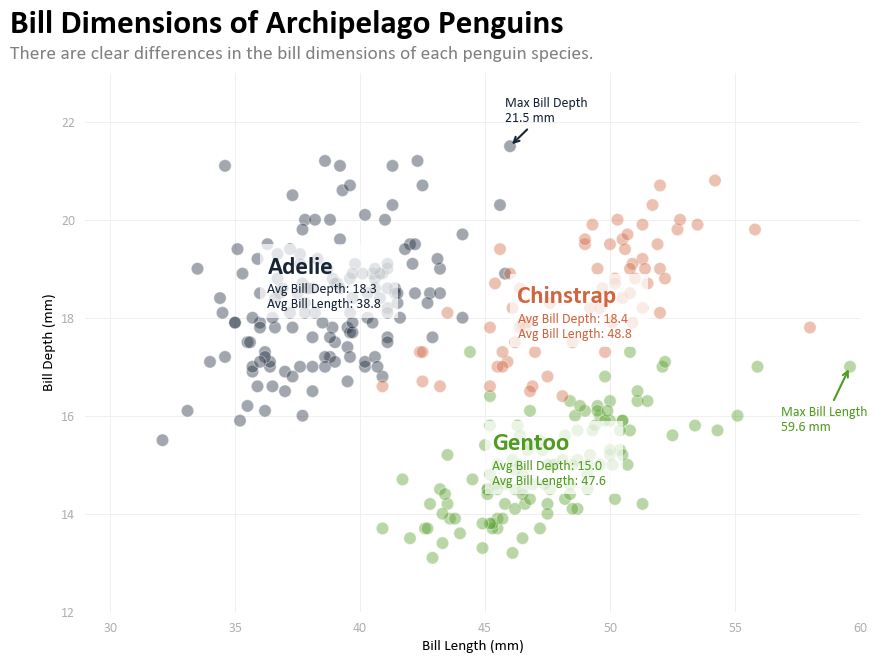

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import warnings
warnings.filterwarnings("ignore")

# Set global font to Calibri
plt.rcParams.update({'font.family': 'Calibri'})

##########################################################
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-15/penguins.csv').dropna()

##########################################################
# Set Colors
species_colors = {'Adelie': '#172537','Chinstrap': '#d0653f','Gentoo': '#509b21'}

# Create Plot
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(df, x = "bill_len", 
                y = "bill_dep",  
                s = 80, 
                hue = "species", 
                palette=species_colors,
                alpha = 0.4, 
                legend=False)

# Format Plot Area
ax.set_axisbelow(True)
plt.grid(True, color='#efefef', linewidth=0.7) # Gridlines
sns.despine(top=True, right=True, left=True, bottom=True) # Borders
plt.xlabel("Bill Length (mm)", fontsize=11) # X-Label
plt.ylabel("Bill Depth (mm)", fontsize=11) # Y-Label
ax.set_xlim(29, 60) # X-Limits
ax.set_ylim(12, 23) # Y-Limits
ax.tick_params(axis='x', labelsize=10, labelcolor='#b1b1b1', top=False, bottom=False)  # X-Axis Tick Labels
ax.tick_params(axis='y', labelsize=10, labelcolor='#b1b1b1', left=False, right=False) # Y-Axis Tick Labels
fig.suptitle('Bill Dimensions of Archipelago Penguins', 
             ha='left', fontsize=24, fontweight = "bold", x=0.05, y=0.97) # Title
fig.text(0.05, 0.9, 'There are clear differences in the bill dimensions of each penguin species.', 
         ha='left', fontsize=14, color="#808080") # Sub-Title

# Add Annotations
adelie_avg_depth = df[df["species"] == "Adelie"]["bill_dep"].mean()
adelie_avg_length = df[df["species"] == "Adelie"]["bill_len"].mean()
ax.text(36.3, 18.9, "Adelie", fontsize=18, ha='left', fontweight = "bold", color=species_colors['Adelie'])
ax.text(36.3, 18.5, f"Avg Bill Depth: {adelie_avg_depth:.1f}", fontsize=10, ha='left', color=species_colors['Adelie'])
ax.text(36.3, 18.2, f"Avg Bill Length: {adelie_avg_length:.1f}", fontsize=10, ha='left', color=species_colors['Adelie'])

gentoo_avg_depth = df[df["species"] == "Gentoo"]["bill_dep"].mean()
gentoo_avg_length = df[df["species"] == "Gentoo"]["bill_len"].mean()
ax.text(45.3, 15.3, "Gentoo", fontsize=18, ha='left', fontweight = "bold", color=species_colors['Gentoo'])
ax.text(45.3, 14.9, f"Avg Bill Depth: {gentoo_avg_depth:.1f}", fontsize=10, ha='left', color=species_colors['Gentoo'])
ax.text(45.3, 14.6, f"Avg Bill Length: {gentoo_avg_length:.1f}", fontsize=10, ha='left', color=species_colors['Gentoo'])

chinstrap_avg_depth = df[df["species"] == "Chinstrap"]["bill_dep"].mean()
chinstrap_avg_length = df[df["species"] == "Chinstrap"]["bill_len"].mean()
ax.text(46.3, 18.3, "Chinstrap", fontsize=18, ha='left', fontweight = "bold", color=species_colors['Chinstrap'])
ax.text(46.3, 17.9, f"Avg Bill Depth: {chinstrap_avg_depth:.1f}", fontsize=10, ha='left', color=species_colors['Chinstrap'])
ax.text(46.3, 17.6, f"Avg Bill Length: {chinstrap_avg_length:.1f}", fontsize=10, ha='left', color=species_colors['Chinstrap'])

# Add Transparent Background Rectangle
rect1 = patches.Rectangle(
    (36, 18),
    5.5,      # Width   
    1.5,    # Height       
    facecolor='white', 
    #edgecolor = "black",   
    alpha=0.7          
)
ax.add_patch(rect1)

rect2 = patches.Rectangle(
    (46, 17.4),
    5.5,      # Width   
    1.5,    # Height       
    facecolor='white', 
    #edgecolor = "black",   
    alpha=0.7          
)
ax.add_patch(rect2)

rect3 = patches.Rectangle(
    (45, 14.4),
    5.5,      # Width   
    1.5,    # Height       
    facecolor='white', 
    #edgecolor = "black",   
    alpha=0.7          
)
ax.add_patch(rect3)

# Add Annotation for Max Bill Length
max_bill_len_row = df.loc[df["bill_len"].idxmax()]
max_x = max_bill_len_row["bill_len"]
max_y = max_bill_len_row["bill_dep"]
max_species = max_bill_len_row["species"]

ax.annotate(f"Max Bill Length\n{max_x:.1f} mm",
            xy=(max_x, max_y),
            xytext=(max_x - 2.75, max_y - 1.3),
            fontsize=10,
            ha='left',
            color=species_colors[max_species],
            #fontweight="bold",
            arrowprops=dict(arrowstyle='->', color=species_colors[max_species], lw=1.5))

# Add Annotation for Max Bill Depth
max_bill_dep_row = df.loc[df["bill_dep"].idxmax()]
max_dep_x = max_bill_dep_row["bill_len"]
max_dep_y = max_bill_dep_row["bill_dep"]
max_dep_species = max_bill_dep_row["species"]

ax.annotate(f"Max Bill Depth\n{max_dep_y:.1f} mm",
            xy=(max_dep_x, max_dep_y),
            xytext=(max_dep_x - 0.2, max_dep_y + 0.5),
            fontsize=10,
            ha='left',
            color=species_colors[max_dep_species],
            #fontweight="bold",
            arrowprops=dict(arrowstyle='->', color=species_colors[max_dep_species], lw=1.5))
